<h3>建立資料集</h3>

In [1]:
import numpy as np
import pandas as pd

In [4]:
drink_info = [
    {"Class": 'A', "Drink": "7Up", "Rank": 7, "Amount": (100, 200), "Quantity": (500, 1000), "Count": 100},
    {"Class": 'B', "Drink": "Sprite", "Rank": 6, "Amount": (200, 10), "Quantity": (500, 1000), "Count": 200},
    {"Class": 'C', "Drink": "Pepsi", "Rank": 5, "Amount": (200, 10), "Quantity": (500, 1000), "Count": 100},
    {"Class": 'D', "Drink": "Coke", "Rank": 4, "Amount": (400, 100), "Quantity": (500, 1000), "Count": 400},
    {"Class": 'E', "Drink": "Cappuccino", "Rank": 3, "Amount": (800, 10), "Quantity": (1, 500), "Count": 400},
    {"Class": 'F', "Drink": "Espresso", "Rank": 2, "Amount": (800, 10), "Quantity": (1, 500), "Count": 200},
    {"Class": 'G', "Drink": "Latte", "Rank": 1, "Amount": (900, 400), "Quantity": (1, 500), "Count": 100},

]

In [105]:
drink_df = pd.DataFrame(columns = ['Class', 'Drink', 'Rank', 'Amount', 'Quantity'])
drink_df

,Class,Drink,Rank,Amount,Quantity


In [106]:
for current_item in drink_info:
    amount_data = np.random.normal(loc=current_item['Amount'][0], scale=current_item['Amount'][1], size=current_item['Count'])
    quantity_data = np.random.randint(low=current_item['Quantity'][0], high=current_item['Quantity'][1], size=current_item['Count'])
    
    current_item_df = pd.DataFrame({
    'Class': [current_item['Class']] * current_item['Count'],
    'Drink': [current_item['Drink']] * current_item['Count'],
    'Rank': [current_item['Rank']] * current_item['Count'],
    'Amount': amount_data,
    'Quantity': quantity_data
    })

    drink_df = pd.concat([drink_df, current_item_df], ignore_index=True)

# print(drink_df[drink_df["Class"] == "A"].head())
# print(drink_df[drink_df["Class"] == "B"].head())
# print(drink_df[drink_df["Class"] == "C"].head())
# print(drink_df[drink_df["Class"] == "D"].head())
# print(drink_df[drink_df["Class"] == "E"].head())
# print(drink_df[drink_df["Class"] == "F"].head())
# print(drink_df[drink_df["Class"] == "G"].head())

In [107]:
drink_df.to_csv("D:\++Yuntech\ML\ML_HW4\drink_dataset.csv", index = False)
drink_df

,Class,Drink,Rank,Amount,Quantity
0,A,7Up,7,2.204249,938
1,A,7Up,7,120.407151,522
2,A,7Up,7,114.905617,873
3,A,7Up,7,-156.765040,901
4,A,7Up,7,233.797273,750
...,...,...,...,...,...
1495,G,Latte,1,1374.852789,39
1496,G,Latte,1,1311.167924,168
1497,G,Latte,1,849.296851,279
1498,G,Latte,1,348.589238,417


In [33]:
drink_df = pd.read_csv('D:\++Yuntech\ML\ML_HW4\drink_dataset.csv')
drink_df

,Class,Drink,Rank,Amount,Quantity
0,A,7Up,7,2.204249,938
1,A,7Up,7,120.407151,522
2,A,7Up,7,114.905617,873
3,A,7Up,7,-156.765040,901
4,A,7Up,7,233.797273,750
...,...,...,...,...,...
1495,G,Latte,1,1374.852789,39
1496,G,Latte,1,1311.167924,168
1497,G,Latte,1,849.296851,279
1498,G,Latte,1,348.589238,417


<h3>1. 做1-of-k（One-Hot Encoding）</h3>

In [34]:
one_hot_drink_df = pd.get_dummies(drink_df, columns=['Drink'])
one_hot_drink_df

,Class,Rank,Amount,Quantity,Drink_7Up,Drink_Cappuccino,Drink_Coke,Drink_Espresso,Drink_Latte,Drink_Pepsi,Drink_Sprite
0,A,7,2.204249,938,True,False,False,False,False,False,False
1,A,7,120.407151,522,True,False,False,False,False,False,False
2,A,7,114.905617,873,True,False,False,False,False,False,False
3,A,7,-156.765040,901,True,False,False,False,False,False,False
4,A,7,233.797273,750,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1495,G,1,1374.852789,39,False,False,False,False,True,False,False
1496,G,1,1311.167924,168,False,False,False,False,True,False,False
1497,G,1,849.296851,279,False,False,False,False,True,False,False
1498,G,1,348.589238,417,False,False,False,False,True,False,False


<h3>資料正規化</h3>

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
numeric_columns = ['Amount', 'Quantity']

scaler = MinMaxScaler()
one_hot_drink_df[numeric_columns] = scaler.fit_transform(one_hot_drink_df[numeric_columns])
one_hot_drink_df

,Class,Rank,Amount,Quantity,Drink_7Up,Drink_Cappuccino,Drink_Coke,Drink_Espresso,Drink_Latte,Drink_Pepsi,Drink_Sprite
0,A,7,0.134658,0.939819,True,False,False,False,False,False,False
1,A,7,0.194099,0.522568,True,False,False,False,False,False,False
2,A,7,0.191332,0.874624,True,False,False,False,False,False,False
3,A,7,0.054717,0.902708,True,False,False,False,False,False,False
4,A,7,0.251119,0.751254,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1495,G,1,0.824921,0.038114,False,False,False,False,True,False,False
1496,G,1,0.792896,0.167503,False,False,False,False,True,False,False
1497,G,1,0.560635,0.278837,False,False,False,False,True,False,False
1498,G,1,0.308844,0.417252,False,False,False,False,True,False,False


<h3>t-SNE降維</h3>

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [10]:
one_hot_tsne = TSNE(n_components=2, random_state=23)
tsne_result_one_hot = one_hot_tsne.fit_transform(one_hot_drink_df.drop(['Class'], axis=1))

In [11]:
class_to_drink = {item['Class']: item['Drink'] for item in drink_info}
class_to_drink

{'A': '7Up',
 'B': 'Sprite',
 'C': 'Pepsi',
 'D': 'Coke',
 'E': 'Cappuccino',
 'F': 'Espresso',
 'G': 'Latte'}

In [39]:
class_to_drink['A']

'7Up'

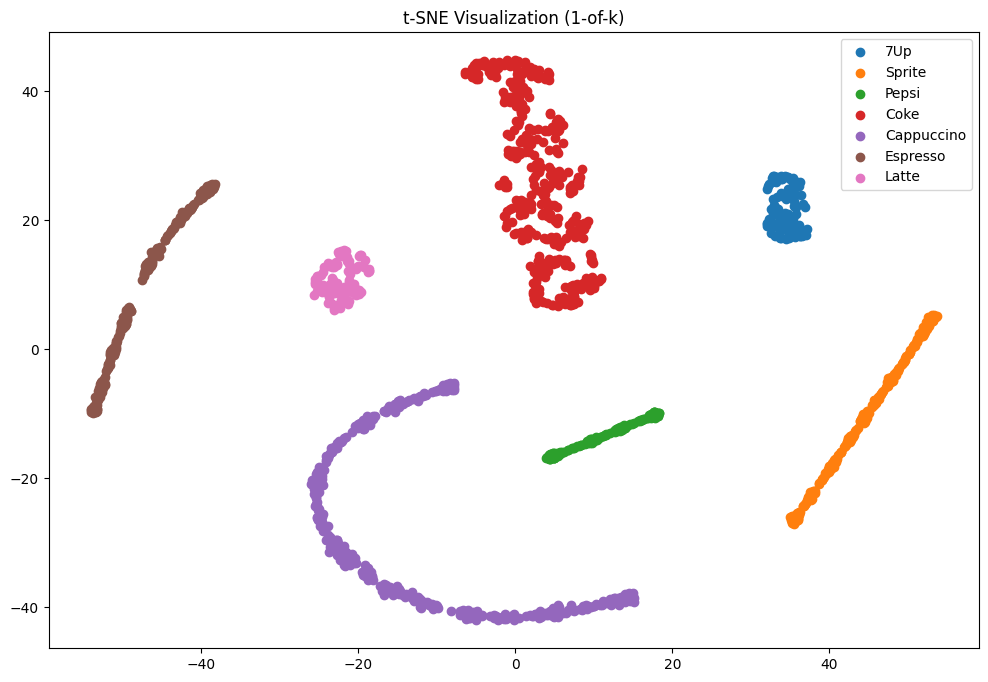

In [12]:
one_hot_drink_df['TSNE_X'] = tsne_result_one_hot[:, 0]
one_hot_drink_df['TSNE_Y'] = tsne_result_one_hot[:, 1]

plt.figure(figsize=(12, 8))
for class_type in one_hot_drink_df['Class'].unique():
    subset = one_hot_drink_df[one_hot_drink_df['Class'] == class_type]
    plt.scatter(subset['TSNE_X'], subset['TSNE_Y'], label=class_to_drink[class_type])

plt.title('t-SNE Visualization (1-of-k)')
plt.legend()
plt.show()

<h3>Dash</h3>

In [36]:
one_hot_drink_df

,Class,Rank,Amount,Quantity,Drink_7Up,Drink_Cappuccino,Drink_Coke,Drink_Espresso,Drink_Latte,Drink_Pepsi,Drink_Sprite
0,A,7,0.134658,0.939819,True,False,False,False,False,False,False
1,A,7,0.194099,0.522568,True,False,False,False,False,False,False
2,A,7,0.191332,0.874624,True,False,False,False,False,False,False
3,A,7,0.054717,0.902708,True,False,False,False,False,False,False
4,A,7,0.251119,0.751254,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1495,G,1,0.824921,0.038114,False,False,False,False,True,False,False
1496,G,1,0.792896,0.167503,False,False,False,False,True,False,False
1497,G,1,0.560635,0.278837,False,False,False,False,True,False,False
1498,G,1,0.308844,0.417252,False,False,False,False,True,False,False


In [14]:
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

In [41]:
# one_hot_drink_df['Original_Drink'] = drink_df['Drink']

tsne = TSNE(n_components=2, random_state=42)
# tsne_result_one_hot = tsne.fit_transform(one_hot_drink_df[numeric_columns])
tsne_result_one_hot = tsne.fit_transform(one_hot_drink_df.drop(['Class'], axis=1))

one_hot_drink_df['TSNE_X'] = tsne_result_one_hot[:, 0]
one_hot_drink_df['TSNE_Y'] = tsne_result_one_hot[:, 1]

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='tsne-plot',
        config={'displayModeBar': True},
        figure=go.Figure(
            data=[
                go.Scatter(
                    x=one_hot_drink_df[one_hot_drink_df['Class'] == class_type]['TSNE_X'],
                    y=one_hot_drink_df[one_hot_drink_df['Class'] == class_type]['TSNE_Y'],
                    mode='markers',
                    name=class_to_drink[class_type],
                    text=class_to_drink[class_type],
                    # one_hot_drink_df[one_hot_drink_df['Class'] == class_type]['Original_Drink'],
                    hoverinfo='text',
                    marker=dict(size=10, opacity=0.7)
                ) for class_type in one_hot_drink_df['Class'].unique()
            ]
        ).update_layout(
            title='t-SNE Visualization (1-of-k)',
            hovermode='closest'
        )
    ),
    html.Div(id='selected-data')
])

@app.callback(
    Output('selected-data', 'children'),
    Input('tsne-plot', 'selectedData')
)
def display_selected_data(selectedData):
    if selectedData is None:
        return "No points selected."
    else:
        selected_points = selectedData['points']
        selected_drinks = [point['text'] for point in selected_points]
        return html.Ul([html.Li(drink) for drink in selected_drinks])

if __name__ == '__main__':
    app.run_server(debug=True)

<h3>2. 考慮屬性值的相似度(Word2Vec)</h3>

In [15]:
from gensim.models import Word2Vec
import gensim.downloader as api
import seaborn as sns

<h3>正規化</h3>

In [15]:
numeric_columns = ['Amount', 'Quantity']

scaler = MinMaxScaler()
word2vec_drink_df = drink_df
word2vec_drink_df[numeric_columns] = scaler.fit_transform(word2vec_drink_df[numeric_columns])
word2vec_drink_df

,Class,Drink,Rank,Amount,Quantity
0,A,7Up,7,0.134658,0.939819
1,A,7Up,7,0.194099,0.522568
2,A,7Up,7,0.191332,0.874624
3,A,7Up,7,0.054717,0.902708
4,A,7Up,7,0.251119,0.751254
...,...,...,...,...,...
1495,G,Latte,1,0.824921,0.038114
1496,G,Latte,1,0.792896,0.167503
1497,G,Latte,1,0.560635,0.278837
1498,G,Latte,1,0.308844,0.417252


In [24]:
# load 預訓練模型
word_vectors = api.load('word2vec-google-news-300')

['7Up' 'Sprite' 'Pepsi' 'Coke' 'Cappuccino' 'Espresso' 'Latte']
0.53983873 0.4601612687110901
0.17452782 0.8254721760749817


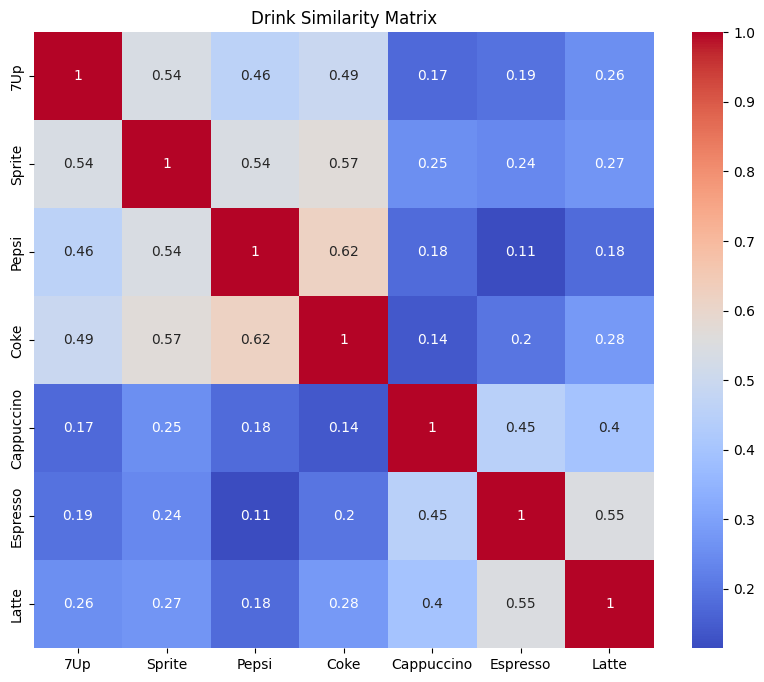

In [25]:
soda_drinks = ['7Up', 'Sprite', 'Pepsi', 'Coke']
coffee_drinks = ['Cappuccino', 'Espresso', 'Latte']

combine = np.append(soda_drinks, coffee_drinks)
print(combine)

print(word_vectors.similarity('7Up', 'Sprite'), word_vectors.distance('7Up', 'Sprite'))
print(word_vectors.similarity('7Up', 'Cappuccino'), word_vectors.distance('7Up', 'Cappuccino'))

similarity_matrix = np.zeros((len(combine), len(combine)))

for i, drink1 in enumerate(combine):
    for j, drink2 in enumerate(combine):
        similarity_matrix[i, j] = word_vectors.similarity(drink1, drink2)

similarity_df = pd.DataFrame(similarity_matrix, index=combine, columns=combine)

similarity_df

# 繪製相似度矩陣
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap="coolwarm", xticklabels=combine, yticklabels=combine)
plt.title("Drink Similarity Matrix")
plt.show()

<h3>t-SNE降維</h3>

In [26]:
tsne = TSNE(n_components=2, random_state=23, perplexity=3)
tsne_results = tsne.fit_transform(1 - similarity_matrix)

In [27]:
tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
tsne_df['Drink'] = combine

In [28]:
word2vec_cor = pd.DataFrame(columns = ['Class', 'TSNE_X', 'TSNE_Y'])
word2vec_cor['Class'] = one_hot_drink_df['Class'].unique()

word2vec_cor['TSNE_X'] = tsne_results[:, 0]
word2vec_cor['TSNE_Y'] = tsne_results[:, 1]

word2vec_cor

,Class,TSNE_X,TSNE_Y
0,A,36.044376,1.407506
1,B,36.935268,-12.931168
2,C,53.813435,-3.567545
3,D,50.839363,-16.468102
4,E,-29.419062,-28.720930
5,F,-34.511677,-15.466628
6,G,-22.383385,-13.721731


C:\Users\love7\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
C:\Users\love7\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\Users\love7\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\love7\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Serie

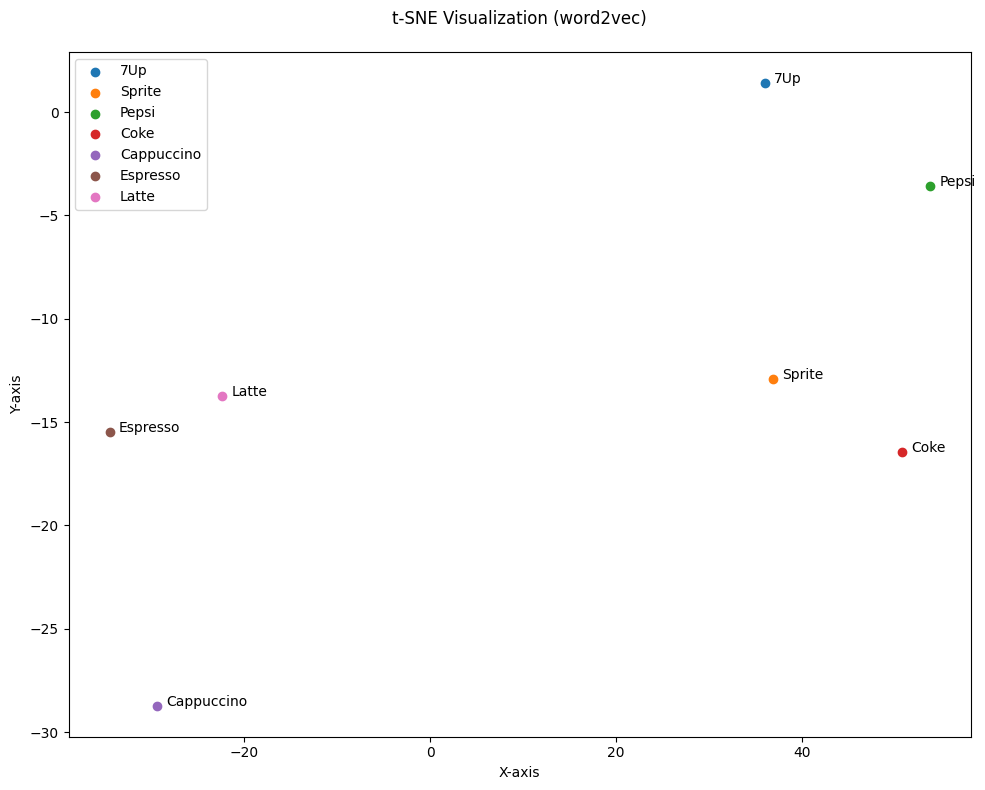

In [29]:
plt.figure(figsize=(10, 8))
for class_type in word2vec_cor['Class'].unique():
    subset = word2vec_cor[word2vec_cor['Class'] == class_type]
    plt.scatter(subset['TSNE_X'], subset['TSNE_Y'], label=class_to_drink[class_type])
    plt.text(subset['TSNE_X']+1, subset['TSNE_Y'], class_to_drink[class_type])

plt.title('t-SNE Visualization (word2vec)', loc='center', pad=20)
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.tight_layout()
plt.show()

In [43]:
app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='tsne-plot',
        figure=px.scatter(
            tsne_df, x='x', y='y', text='Drink',
            title='t-SNE Visualization (Word2Vec)',
            labels={'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2'}
        )
    ),
    html.Div(id='selected-data')
])

@app.callback(
    Output('selected-data', 'children'),
    Input('tsne-plot', 'selectedData')
)
def display_selected_data(selectedData):
    if selectedData is None:
        return "No points selected."
    else:
        selected_points = selectedData['points']
        selected_drinks = [point['text'] for point in selected_points]
        return html.Ul([html.Li(drink) for drink in selected_drinks])

if __name__ == '__main__':
    app.run_server(debug=True)